In [3]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
%pylab inline
import numpy as np
from ipywidgets import interact, FloatSlider, RadioButtons,Dropdown,SelectMultiple,FloatRangeSlider
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
import gc, argparse, sys, os, errno

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from tqdm import tqdm
sns.set()
import h5py
import os
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy

/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [4]:
import scipy.io as sio   
import argparse
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import pickle
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct
import h5py

In [5]:
data_1 = sio.loadmat('data_paper_WSNL/1000data.mat')
data_2 = sio.loadmat('data_paper_WSNL/TXRXLoc2000.mat')
local = data_2['RXm'][:1000,:2]
rss = data_1['data_db_rss']
aoa = data_1['data_db_aoa']
toa = data_1['data_db_toa']
data_4 = data_1['data'][:,18:24]
data_5 = data_1['data'][:,24:]
data_whole = np.concatenate((rss,aoa,toa,data_4,data_5),axis =1)
local_x = local[:,:1]
local_y = local[:,1:]

In [6]:
data_whole.shape

(1000, 30)

In [7]:
local_x.shape

(1000, 1)

In [8]:
10530-900

9630

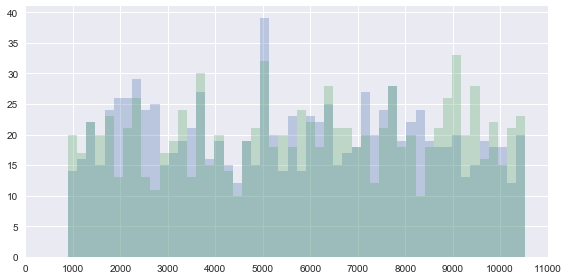

In [9]:
fig,ax=plt.subplots(1,figsize=(8,4))
ax.hist(local_x,bins=50,alpha=0.3)
ax.hist(local_y,bins=50,alpha=0.3)
ax.set_xticks(np.arange(0,12000,1000))
fig.tight_layout()

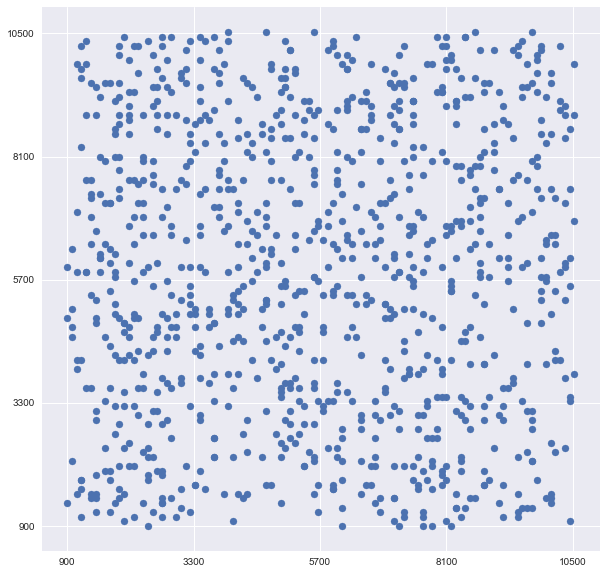

In [10]:
fig,ax = plt.subplots(1,figsize=(10,10))
ax.scatter(local_x,local_y)
ax.set_xticks(np.arange(900,10530,2400))
ax.set_yticks(np.arange(900,10530,2400))

In [11]:
bound = np.array([3300,5700,8100])
#给一个在block的label  1000
boundlabel = np.zeros([1000]).astype('int')
for i in range(1000):
    tmparr  = (bound - local_x[i])
    countfornegx =  np.where(tmparr<0)[0].shape[0]  #0个 x小于3300 。。。记为第一块儿
    tmparr  = (bound - local_y[i])
    countfornegy =  np.where(tmparr<0)[0].shape[0]
    boundlabel[i] = countfornegx + 4*countfornegy

In [12]:
tableau20[boundlabel[i]]

array([0.78039216, 0.78039216, 0.78039216])

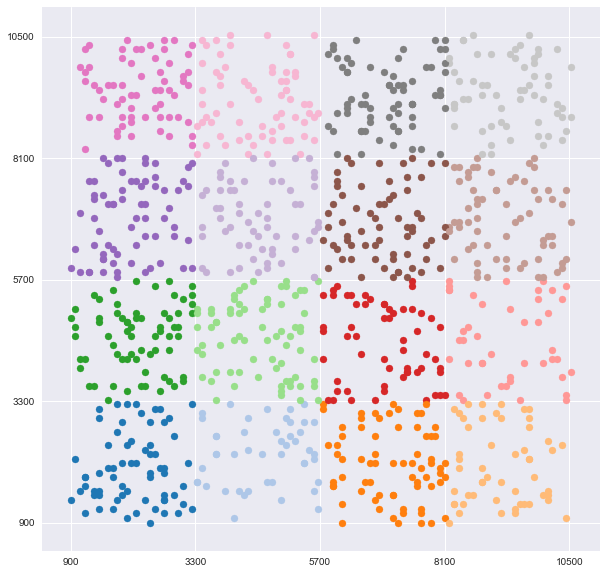

In [22]:
fig,ax = plt.subplots(1,figsize=(10,10))
for i in range(1000):
    ax.scatter(local_x[i],local_y[i],c=tableau20[boundlabel[i]])
ax.set_xticks(np.arange(900,10530,2400))
ax.set_yticks(np.arange(900,10530,2400))

##### 把x y 特征都normalize

#### 尝试PCA，tSNE能否分开网格内的点

In [13]:
print (np.min(local_x),np.max(local_x),np.min(local_y),np.max(local_y))

(900, 10530, 900, 10530)


In [14]:
np.sum(np.isinf(data_whole))

0

In [22]:
np.sum(np.isnan(data_whole))

0

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_whole+0.00001)
x_2d = pca.transform(data_whole+0.00001)

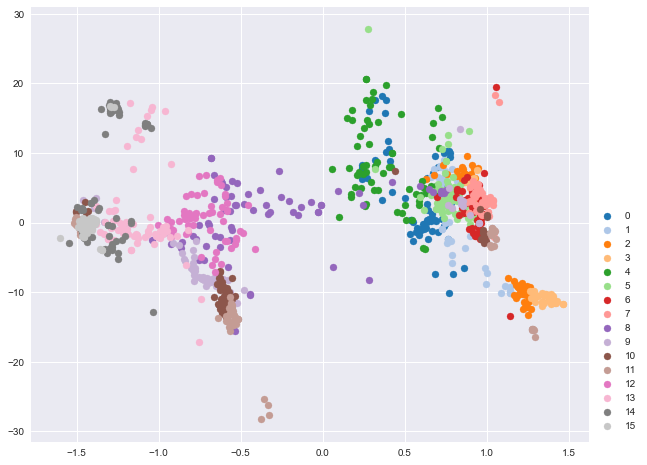

In [24]:
plt.figure(figsize=(10,8))
for i, c, label in zip(np.arange(0,16), tableau20[:16], np.arange(0,16)):
    plt.scatter(x_2d[boundlabel == i, 0], x_2d[boundlabel == i, 1], c=c, label=label)
plt.legend(bbox_to_anchor=(1.1,0.55))
plt.show()

tSNE

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(data_whole)

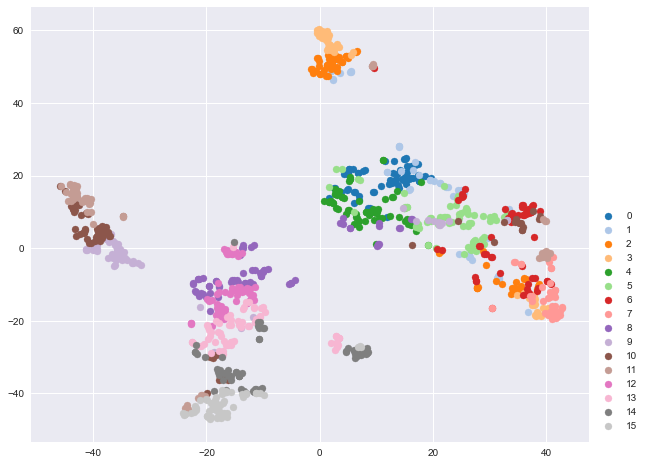

In [27]:
plt.figure(figsize=(10,8))
for i, c, label in zip(np.arange(0,16), tableau20[:16], np.arange(0,16)):
    plt.scatter(X_2d[boundlabel == i, 0], X_2d[boundlabel == i, 1], c=c, label=label)
plt.legend(bbox_to_anchor=(1,0.55))
plt.show()

#### 3D surface
z为某个特征，或者PCA、VAE得到的特征

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm

In [29]:
X = local_x
Y = local_y
Z = data_whole[:,0]

In [30]:
def plot_3d_scatter(width,height,azim,elev,contextind,styind):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig = plt.figure(figsize=(width,height))
    ax = Axes3D(fig)
    ax.scatter3D(X,Y,Z,c=Z,cmap=plt.cm.jet)  
    ax.view_init(azim=azim,elev=elev)  # 50 20
    ax.set_title('3D scatter')
    fig.tight_layout()
    plt.show()
interact(plot_3d_scatter,
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
         styind=FloatSlider(min=0,max=2,step=1),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(FloatSlider(value=25.0, description=u'width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description=u'height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description=u'azim', max=180.0, step=2.0), FloatSlider(value=32.0, description=u'elev', max=180.0, step=1.0), FloatSlider(value=2.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d_scatter>

In [31]:
from matplotlib.mlab import griddata

In [37]:
# creation of a 2D grid

def plot_3d_grid_surface(width,height,azim,elev,contextind,styind):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig = plt.figure(figsize=(width,height))
    X = local_x
    Y = local_y
    Z = data_whole[:,0]
    x = X.ravel()
    y = Y.ravel()
    z = Z.ravel()
    xi = np.linspace(min(x), max(x))
    yi = np.linspace(min(y), max(y))
    X, Y = np.meshgrid(xi, yi)
    # interpolation
    Z = griddata(x, y, z, xi, yi,interp='linear')
    ax = Axes3D(fig)
    ax.scatter3D(x,y,z,c=z,cmap=plt.cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.binary_r,linewidth=1, antialiased=True,alpha=0.2) 
    ax.view_init(azim=azim,elev=elev)  # 50 20
    ax.set_title('3D surface')
    fig.tight_layout()
    plt.show()
interact(plot_3d_grid_surface,
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
         styind=FloatSlider(min=0,max=2,step=1),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(FloatSlider(value=25.0, description=u'width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description=u'height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description=u'azim', max=180.0, step=2.0), FloatSlider(value=32.0, description=u'elev', max=180.0, step=1.0), FloatSlider(value=2.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d_grid_surface>

##### 用tsne的结果画surface

In [36]:
# creation of a 2D grid

def plot_3d_grid_surface(width,height,azim,elev,contextind,styind):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig = plt.figure(figsize=(width,height))
    X = local_x
    Y = local_y
    Z = data_whole[:,0]
    x = X.ravel()
    y = Y.ravel()
    z = X_2d[:,0].ravel()
    xi = np.linspace(min(x), max(x))
    yi = np.linspace(min(y), max(y))
    X, Y = np.meshgrid(xi, yi)
    # interpolation
    Z = griddata(x, y, z, xi, yi,interp='linear')
    ax = Axes3D(fig)
    ax.scatter3D(x,y,z,c=z,cmap=plt.cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.binary_r,linewidth=1, antialiased=True,alpha=0.2) 
    ax.view_init(azim=azim,elev=elev)  # 50 20
    ax.set_title('3D surface')
    fig.tight_layout()
    plt.show()
interact(plot_3d_grid_surface,
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
         styind=FloatSlider(min=0,max=2,step=1),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(FloatSlider(value=25.0, description=u'width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description=u'height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description=u'azim', max=180.0, step=2.0), FloatSlider(value=32.0, description=u'elev', max=180.0, step=1.0), FloatSlider(value=2.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d_grid_surface>

In [ ]:
def plot_wireframe():
    X = local_x
    Y = local_y
    Z = data_whole[:,0]
    x = X.ravel()
    y = Y.ravel()
    z = Z.ravel()
    xi = np.linspace(min(x), max(x))
    yi = np.linspace(min(y), max(y))
    X, Y = np.meshgrid(xi, yi)
    # interpolation
    Z = griddata(x, y, z, xi, yi,interp='linear')
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(X, Y, Z, color='black',alpha=0.3)
    ax.set_title('wireframe');
test()

Running unit tests for numpy.linalg
NumPy version 1.14.0
NumPy relaxed strides checking option: True
NumPy is installed in /Users/james/anaconda2/lib/python2.7/site-packages/numpy
Python version 2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 11:07:58) [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
nose version 1.3.7


S..........................................................................................................F.F......F.FF...FFFFF.............................S...

In [33]:
# creation of a 2D grid

def plot_3d_trisurface(width,height,azim,elev,contextind,styind):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig = plt.figure(figsize=(width,height))
    X = local_x
    Y = local_y
    Z = data_whole[:,0]
    x = X.ravel()
    y = Y.ravel()
    z = Z.ravel()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(x,y,z,cmap='viridis', edgecolor='none')
    ax.view_init(azim=azim,elev=elev)  # 50 20
    ax.set_title('3D trisurf')
    fig.tight_layout()
    plt.show()
interact(plot_3d_grid_surface,
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
         styind=FloatSlider(min=0,max=2,step=1),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=36),
    azim= FloatSlider(min=0,max=180,step=2,value=0),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(FloatSlider(value=25.0, description=u'width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description=u'height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description=u'azim', max=180.0, step=2.0), FloatSlider(value=32.0, description=u'elev', max=180.0, step=1.0), FloatSlider(value=2.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d_grid_surface>

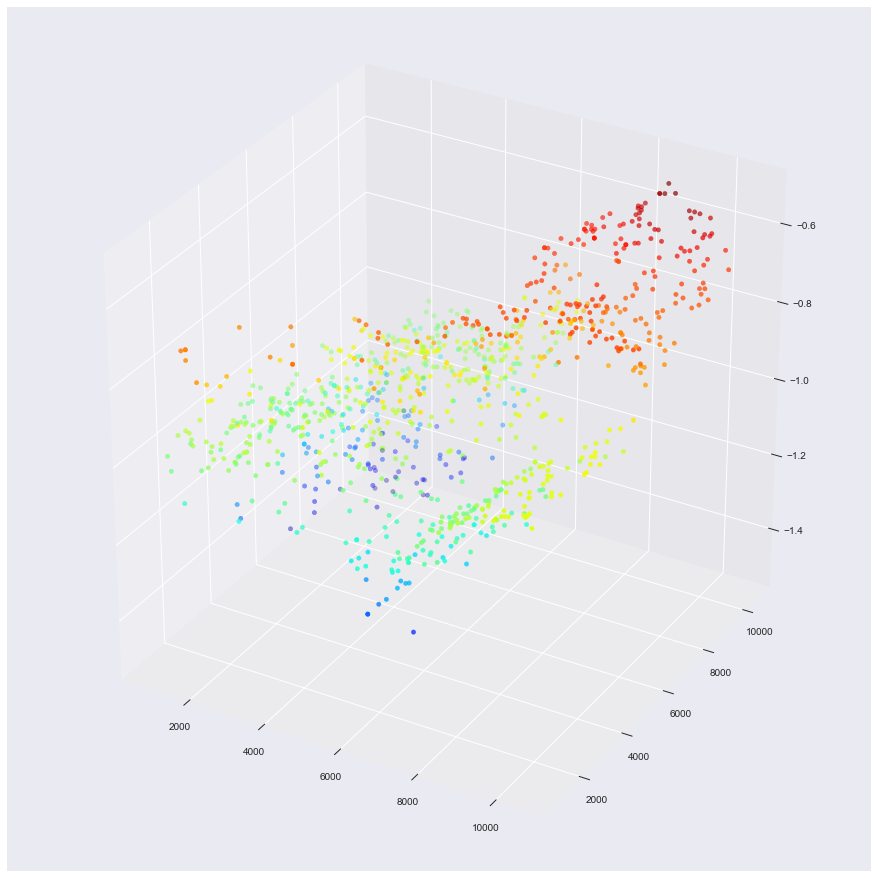

In [13]:
import scipy as sp
import scipy.interpolate
def spline_3d(x,y,z):
    # 2D grid construction
    spline = sp.interpolate.Rbf(x,y,z,function='thin-plate')
    xi = np.linspace(min(x), max(x))
    yi = np.linspace(min(y), max(y))
    X, Y = np.meshgrid(xi, yi)
    # interpolation
    Z = spline(X,Y)
    #print xi
    fig = plt.figure(figsize=(12,12))
    ax = Axes3D(fig)
    ax.scatter3D(x,y,z,c=z,cmap=plt.cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.Greys_r,linewidth=1, antialiased=True)
    plt.show()
spline_3d(X,Y,Z)

In [14]:
import visvis
def visvisplot(x,y,z):
    xi = np.linspace(min(x), max(x))
    yi = np.linspace(min(y), max(y))
    Z = griddata(x, y, z, xi, yi,interp='linear')
    f = visvis.gca()
    m = visvis.grid(xi,yi,Z) 
    f.daspect = 1,1,10 # z x 10
    # draped colors
    m = visvis.surf(xi,yi,Z)
    m.colormap = visvis.CM_JET
visvisplot(X.ravel(),Y.ravel(),Z.ravel())